In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'C:\Users\rajar\OneDrive\Desktop\Excel Folder\CreditCardFraud.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
data.sample(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
262873,160689.0,2.206404,-1.538844,-0.354867,-1.644509,-1.550485,-0.178575,-1.531727,0.049143,-1.162376,1.665487,0.511404,-0.009236,0.631302,-0.491520,-0.560265,0.011512,0.044612,0.405997,0.156194,-0.385695,-0.313111,-0.455814,0.388340,-0.455249,-0.601939,-0.438451,0.040487,-0.045513,25.90,0
209409,137546.0,-3.309530,-3.030357,-0.403419,-1.767371,-3.988848,1.831865,4.502206,0.238375,0.310114,-3.146708,-1.641197,-1.026625,-1.421069,0.320584,0.028614,0.911544,-0.637719,0.750689,-1.273845,2.491694,0.931520,0.213320,2.655916,0.472023,1.185621,0.621137,-0.631388,0.071162,1311.46,0


In [5]:
data = data.drop('Time',axis=1)

In [6]:
data.sample(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78344,-0.204598,0.498761,2.479616,1.271775,-0.555612,0.029703,0.089403,0.009047,0.527486,-0.113236,-1.001992,-0.588522,-1.156696,-0.351336,0.621546,-0.441770,0.076495,0.357029,0.913254,0.047697,-0.000778,0.335705,-0.094076,0.358738,-0.557865,-0.378356,0.059004,-0.049503,9.99,0
141662,-0.521765,1.358837,0.863782,-0.194896,0.506120,-0.497733,0.780908,-0.090633,-0.350090,-0.241968,-0.706908,0.372709,1.615803,-0.818640,0.823188,0.544418,-0.382397,-0.048228,0.186071,0.347910,-0.335977,-0.754708,-0.128926,-0.485345,0.047121,0.124971,0.366555,0.148981,7.99,0
188909,1.916129,-0.327016,-0.301308,0.470810,-0.629335,-0.680979,-0.322472,-0.162648,1.104365,-0.213915,-0.667043,1.126237,1.268475,-0.261435,0.533242,0.160197,-0.629244,-0.310126,-0.072573,-0.074801,-0.147923,-0.300756,0.317943,-0.035360,-0.395056,-0.628346,0.035537,-0.022192,44.99,0
22125,-0.352753,-0.505905,0.777811,-4.058765,-0.719717,-0.287478,-0.054924,0.134132,0.900778,-1.105235,-0.525351,-0.547909,-2.136366,0.320853,0.225607,-1.800368,-0.464385,2.687416,0.590725,-0.672024,-0.274380,-0.269197,-0.256945,-0.905589,-0.097144,-0.906312,0.081995,0.125693,37.66,0


In [7]:
data.isnull().sum().sum()

0

<AxesSubplot:>

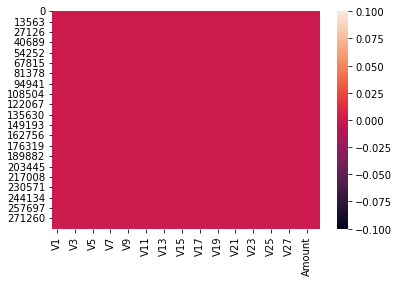

In [8]:
sns.heatmap(data.isnull())

In [9]:
scaler = StandardScaler()

In [10]:
data['Amount'] = scaler.fit_transform(pd.DataFrame(data['Amount']))

In [11]:
type(data['Amount'])

pandas.core.series.Series

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
data.duplicated().any()

True

In [14]:
data.shape

(284807, 30)

In [15]:
data = data.drop_duplicates()

In [16]:
data.shape

(275663, 30)

In [17]:
x = data.drop('Class',axis=1)

In [18]:
y = data['Class']

In [19]:
import warnings
warnings.filterwarnings('ignore')

# As We Can See Our Data Is very imbalanced

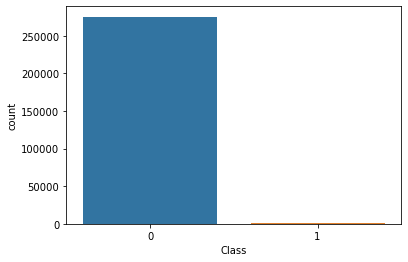

In [20]:
sns.countplot(data['Class'])
plt.show()

# Creating UnderSampling Mathod

In [21]:
normal_data = data[data['Class']==0]
fraud_data = data[data['Class']==1]

In [22]:
normal_data.shape

(275190, 30)

In [23]:
fraud_data.shape

(473, 30)

In [24]:
normal_sample = normal_data.sample(473)

In [25]:
normal_sample.shape

(473, 30)

In [26]:
new_data = pd.concat([fraud_data,normal_sample],ignore_index=True)

In [27]:
new_data['Class'].value_counts()

1    473
0    473
Name: Class, dtype: int64

In [28]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1


In [29]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [31]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
482,-1.176660,-0.290410,1.869386,0.075558,-0.032172,1.408955,-0.817100,0.886342,0.604217,-0.760972,0.373840,0.981965,0.179202,-0.455822,0.930396,-1.779910,1.762250,-2.471249,-0.434041,-0.043658,0.010066,0.343498,0.200423,-0.537393,-0.722772,1.069157,-0.352273,-0.295056,-0.283943
938,-0.705155,1.863814,-2.075576,-0.033534,0.654618,-1.304994,0.187421,0.730871,-0.480172,-1.638513,0.988437,0.028629,-0.523953,-1.755847,0.184727,1.162861,1.783005,2.220663,-0.029152,-0.179178,0.281724,0.716008,-0.218626,-0.635896,-0.294912,-0.140571,0.035913,0.058480,-0.349231
939,-0.473387,0.952734,1.656832,0.001432,-0.126934,-0.633456,0.575107,0.101531,-0.286767,-0.330107,-0.037862,-0.330720,-0.936985,0.366941,1.173475,-0.147536,0.054759,-0.799195,-0.461381,-0.006494,-0.190286,-0.492623,0.054880,0.356736,-0.341322,0.083700,0.276992,0.118772,-0.346073
116,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,6.455828,-13.380222,0.545279,-13.026864,-0.453595,-13.251542,-22.883999,-9.287832,4.038231,0.723314,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,-0.307731
76,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,-8.009159,4.303096,-6.008660,1.138969,-5.580447,-0.110737,-5.491073,-11.588544,-4.715420,0.734573,1.697856,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,0.046539
48,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,-13.348278,10.187587,-14.563980,0.593759,-14.491598,-0.281393,-8.264129,-12.439805,-4.837079,0.753150,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,-0.349231
386,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,-0.186207,-0.159325,1.200304,0.281744,-0.623844,-0.658246,-0.155888,0.056227,0.653662,0.334655,1.028927,0.062199,-0.284413,-0.706865,0.131405,0.600742,-0.604264,0.262938,0.099145,0.010810,-0.335278
263,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,1.274629,0.023682,-1.521696,0.727242,0.166505,0.348038,-0.566390,0.216016,-1.140376,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,1.063412
766,0.896730,-0.806379,1.001637,0.112772,-0.861224,0.915576,-0.784372,0.454555,0.925138,-0.416718,1.359667,1.447453,-0.124663,-0.281703,-0.485870,-0.502478,0.459150,-1.031454,0.000562,0.064358,-0.068155,-0.118228,0.044123,-0.194938,-0.076025,0.973781,-0.022341,0.014097,0.062572
662,-1.437310,1.092629,0.788319,0.800727,-0.327798,1.550857,0.826800,0.344385,-0.541052,0.288833,0.988653,0.425561,0.370818,0.320447,2.766588,-1.912438,1.574988,-2.071691,-0.072600,-0.163812,0.150428,0.976591,0.124482,-0.561809,-0.479101,0.668685,-0.274537,-0.131572,0.286464


In [32]:
y_test

869    0
935    0
657    0
362    1
255    1
833    0
818    0
264    1
14     1
31     1
905    0
689    0
815    0
638    0
230    1
214    1
670    0
460    1
364    1
698    0
566    0
650    0
800    0
380    1
77     1
204    1
142    1
316    1
385    1
345    1
620    0
772    0
876    0
416    1
101    1
717    0
249    1
740    0
367    1
261    1
887    0
298    1
495    0
283    1
366    1
857    0
729    0
936    0
571    0
658    0
762    0
747    0
576    0
352    1
409    1
626    0
491    0
294    1
817    0
97     1
452    1
406    1
55     1
524    0
824    0
432    1
712    0
596    0
145    1
676    0
65     1
703    0
251    1
631    0
736    0
582    0
750    0
262    1
200    1
408    1
247    1
811    0
60     1
141    1
144    1
527    0
597    0
310    1
732    0
299    1
175    1
379    1
896    0
648    0
500    0
656    0
710    0
447    1
8      1
773    0
942    0
580    0
267    1
356    1
838    0
604    0
350    1
351    1
312    1
34     1
439    1
1

# Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression()

In [35]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = log_reg.predict(X_test)

In [37]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [38]:
log_reg.score(X_test,y_pred)

1.0

In [39]:
def All_Model_Score(x,y):
    print(f'Accuracy_Score:->  {accuracy_score(x,y)}')
    print(f'F1_Score:->        {f1_score(x,y)}')
    print(f'Precision_Score:-> {precision_score(x,y)}')
    print(f'Recall_Score:->    {recall_score(x,y)}')

In [40]:
print('All Score Is Here You Can See\n')
All_Model_Score(y_test,y_pred)

All Score Is Here You Can See

Accuracy_Score:->  0.9577464788732394
F1_Score:->        0.9586206896551724
Precision_Score:-> 0.9652777777777778
Recall_Score:->    0.952054794520548


In [41]:
from sklearn.tree import DecisionTreeClassifier
des_tree = DecisionTreeClassifier()

In [42]:
des_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred_des = des_tree.predict(X_test)

In [44]:
All_Model_Score(y_test,y_pred_des)

Accuracy_Score:->  0.9084507042253521
F1_Score:->        0.910958904109589
Precision_Score:-> 0.910958904109589
Recall_Score:->    0.910958904109589


# Random_Forest Algo

In [45]:
from sklearn.ensemble import RandomForestClassifier
ran_mod = RandomForestClassifier()

In [46]:
ran_mod.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred_ran = ran_mod.predict(X_test)

In [48]:
All_Model_Score(y_test,y_pred_ran)

Accuracy_Score:->  0.9753521126760564
F1_Score:->        0.9754385964912281
Precision_Score:-> 1.0
Recall_Score:->    0.952054794520548


# Calculating Finnal Score With Theire Models With comparing

In [49]:
final_data = pd.DataFrame({'Models':['log_reg','des_tree','ran_mod'],'ACCU':[accuracy_score(y_test,y_pred)*100,accuracy_score(y_test,y_pred_des)*100,accuracy_score(y_test,y_pred_ran)*100]})

In [50]:
final_data

,Models,ACCU
0,log_reg,95.774648
1,des_tree,90.845070
2,ran_mod,97.535211


<AxesSubplot:xlabel='Models', ylabel='ACCU'>

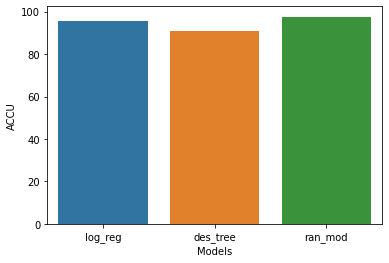

In [51]:
sns.barplot(final_data['Models'],final_data['ACCU'])

# Using OverSampling Mathod

In [52]:
df = pd.read_csv(r'C:\Users\rajar\OneDrive\Desktop\Excel Folder\CreditCardFraud.csv')

In [53]:
df.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
125313,77613.0,1.192901,0.143424,0.594601,1.056362,-0.425928,-0.249381,-0.272006,0.130513,0.091339,0.237701,0.798606,0.112233,-1.234600,0.652244,0.561637,0.717663,-0.847669,0.663672,-0.047370,-0.197434,-0.063601,-0.262812,-0.002957,-0.049301,0.382967,-0.471719,0.021474,0.015278,3.60,0
133153,80271.0,-0.426658,1.633157,-0.024176,1.148752,0.224803,-0.702450,0.320102,0.457544,-0.591709,-0.891688,0.046127,-0.332755,-0.364490,-1.031485,1.450937,0.114979,1.578612,0.450433,-0.299689,-0.019914,0.050194,0.233486,-0.062094,-0.073824,-0.156997,-0.278284,0.237452,0.076296,1.00,0
194519,130625.0,0.318191,1.135696,0.605257,4.668026,-0.470417,0.559971,-0.485395,0.678699,-1.072986,1.530762,-1.786790,-1.361862,-1.524483,0.694807,0.767669,0.412850,0.162938,0.433749,0.875675,-0.136301,0.138374,0.304038,0.704394,-0.193246,-2.880015,-0.252702,0.342442,0.340294,25.79,0


In [54]:
df = df.drop('Time',axis = 1)

In [55]:
df = df.drop_duplicates()

In [56]:
print(f'Total Rows Of Data:-> {df.shape[0]}')
print(f'Total Columns Of Data:-> {df.shape[1]}')

Total Rows Of Data:-> 275663
Total Columns Of Data:-> 30


In [57]:
sc = StandardScaler()

In [58]:
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [59]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.233169,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.347092,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.137702,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.130015,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.081308,0


In [60]:
x = df.drop('Class',axis=1).values
x

array([[-1.35980713e+00, -7.27811730e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530530e-02,  2.33169327e-01],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309900e-03,  1.47241690e-02, -3.47092005e-01],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518410e-02,  1.13770248e+00],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477200e-03, -2.65608290e-02, -8.96412718e-02],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01, -3.18223086e-01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530900e-03,  1.36489140e-02,  4.99268889e-01]])

In [61]:
y = df['Class'].values

In [62]:
x.shape

(275663, 29)

In [63]:
y.shape

(275663,)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=51)

In [65]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# OverSampling Data

In [66]:
from imblearn.over_sampling import SMOTE

In [68]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [72]:
LR = LogisticRegression()

In [74]:
LR.fit(x_res,y_res)

LogisticRegression()

In [75]:
y_pred1 = LR.predict(x_res)

In [76]:
y_pred1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [80]:
LR.score(x_res,y_pred1)

1.0